# Laugh test 2: Storage and transmission in soils
This notebook plots SUMMA simulations for the test case defined in Miller et al. (1998). 

## Expectations
The simulations should reproduce Figure 1 in Miller et al. (1998):

<div>
<img src="img/miller1998_fig1.png" width="300"/>
    <center> Figure 1a in Miller et al. (1998): "Dense-grid solutions" </center>
</div>

## Meta data

| Data  | Value  |
|:---|:---|
| Model name| Structure for Unifying Multiple Modelling Alternatives (SUMMA) |
| Model version  |  See attributes in output .nc file |
| Model reference | Clark et al. (2015a,b) |
| Model runs by | R. Zolfaghari |
| Notebook code by | W. Knoben, A. Bennett |
    
## Reference(s)
Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Rasmussen, R. M. (2015a). A unified approach for process-based hydrologic modeling: 1. Modeling concept. Water Resources Research, 51(4), 2498–2514. https://doi.org/10.1002/2015WR017198

Clark, M. P., Nijssen, B., Lundquist, J. D., Kavetski, D., Rupp, D. E., Woods, R. A., … Marks, D. G. (2015b). A unified approach for process-based hydrologic modeling: 2. Model implementation and case studies. Water Resources Research, 51, 2515–2542. https://doi.org/10.1002/2015WR017200

Miller, C. T., Williams, G. A., Kelley, C. T. & Tocci, M. D. (1998), Robust solution of Richard's equation for nonuniform porous media, Water Resour. Res., 34(10), 2599–2610, https://doi.org/10.1029/98WR01673

In [1]:
# modules
from pathlib import Path
from matplotlib.ticker import MultipleLocator
import xarray as xr # note, also needs netcdf4 library installed
import matplotlib.pyplot as plt

In [2]:
# Specify the data locations relative to the notebook
sim_path = Path("./output")
sim_sand = "millerSand_output_timestep.nc"
sim_clay = "millerClay_output_timestep.nc"
sim_loam = "millerLoam_output_timestep.nc"

In [3]:
# Specify the time of interest, converted into a timestep index by dividing by time step length
dt = 900 # time step length in [s], this is a setting in the model input files
time_sand = int( (0.18*86400)/dt ) # d * (s/d) / (s/timestep)
time_clay = int( (1.00*86400)/dt ) # int() rounds down to nearest integer
time_loam = int( (2.25*86400)/dt )

In [4]:
# Specify plotting dimensions
midToto = 0

Processing starts here

In [5]:
# Load the data
ds_sand = xr.open_dataset( sim_path / sim_sand ).isel(hru=0, gru=0, time=time_sand).load()
ds_clay = xr.open_dataset( sim_path / sim_clay ).isel(hru=0, gru=0, time=time_clay).load()
ds_loam = xr.open_dataset( sim_path / sim_loam ).isel(hru=0, gru=0, time=time_loam).load()

In [6]:
# Remove missing data layers
ds_sand = ds_sand.where(ds_sand['mLayerDepth'] != -9999, drop=True)
ds_clay = ds_clay.where(ds_clay['mLayerDepth'] != -9999, drop=True)
ds_loam = ds_loam.where(ds_loam['mLayerDepth'] != -9999, drop=True)

In [7]:
# Ensure that we can actually read the figure labels
font = {'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

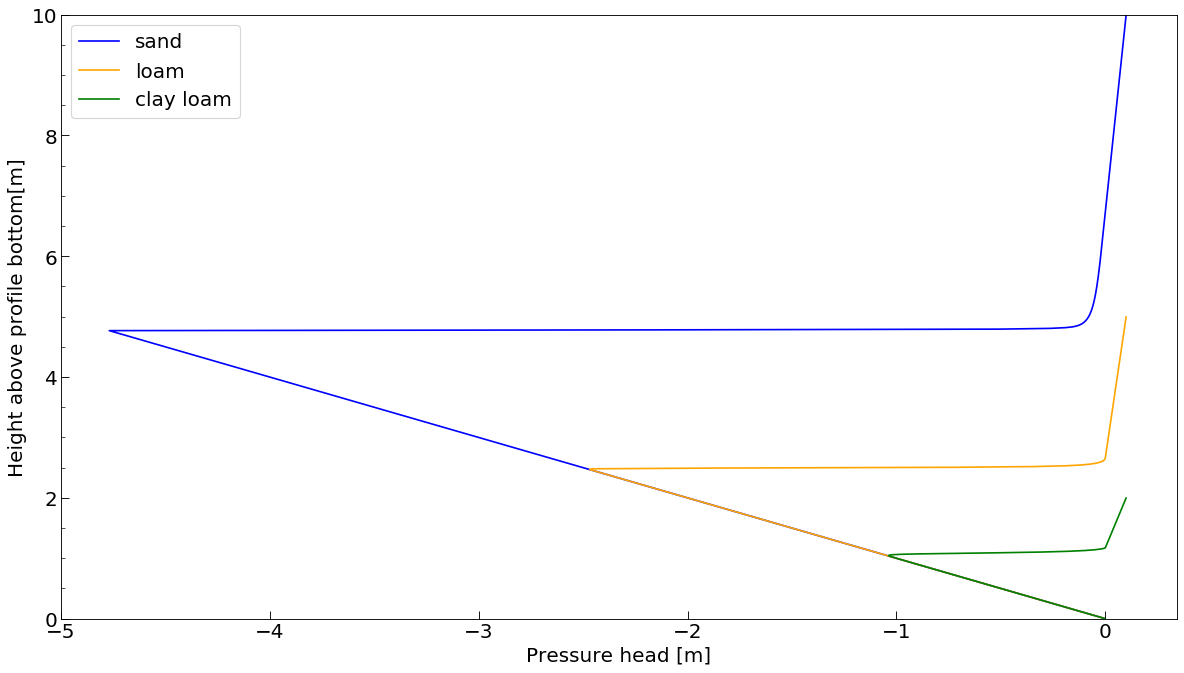

In [8]:
# Open a figure
fig = plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k');

# Plot the data
plt.plot(ds_sand['mLayerMatricHead'].isel(midToto=midToto),ds_sand['mLayerHeight'][::-1], \
         marker='', color='blue',   label='sand'); # [::-1] inverts the layer height vector -- see below
plt.plot(ds_loam['mLayerMatricHead'].isel(midToto=midToto),ds_loam['mLayerHeight'][::-1], \
         marker='', color='orange', label='loam');
plt.plot(ds_clay['mLayerMatricHead'].isel(midToto=midToto),ds_clay['mLayerHeight'][::-1], \
         marker='', color='green',  label='clay loam');

# Labels
plt.xlabel('Pressure head [m]'); 
plt.ylabel('Height above profile bottom[m]');
plt.legend();

# Axes
plt.xlim(left=-5)
plt.ylim(0,10)
ax = plt.gca()
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.tick_params(which='major', length=7, direction='in')
ax.tick_params(which='minor', length=4, direction='in')

# Save the figure
plt.savefig('img/lt2_miller1998.png');



# ds_sand['mLayerHeight'][::-1] 
# -----------------------------
# This reverses SUMMA's mLayerHeight variable, from a depth below surface (with positive values for deeper layers)
# into a height above bottom of the profile (see test case specifications).